In [23]:
import matplotlib.pyplot as plt

decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrowArgs = dict(arrowstyle="<-")

def plotNode(nodeText, centerPoint, parentPoint, nodeType):
    createPlot.ax1.annotate(nodeText, xy=parentPoint, xycoords='axes fraction', xytext=centerPoint, textcoords='axes fraction', va='center', bbox=nodeType, arrowprops=arrowArgs)
    
def createPlot():
    figure = plt.figure(1, facecolor='white')
    figure.clf()
    
    createPlot.ax1 = plt.subplot(111, frameon=False)
    
    plotNode('a decision node', (0.5,0.1),(0.7,0.8), decisionNode)
    plotNode('a leaf node', (0.8,0.1),(0.7,0.8), leafNode)
    plt.show()
    
def getNumLeafs(myTree):
    numLeafs = 0
    
    firstString = list(myTree.keys())[0]
    
    secondDictionary = myTree[firstString]
    
    for key in secondDictionary.keys():
        if type(secondDictionary[key]).__name__ == 'dict':
            numLeafs += getNumLeafs(secondDictionary[key])
        else:
            numLeafs += 1
    
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0
    
    firstString = list(myTree.keys())[0]
    
    secondDictionary = myTree[firstString]
    
    for key in secondDictionary.keys():
        
        if type(secondDictionary[key]).__name__ == 'dict':
            thisDepth = 1 + getTreeDepth(secondDictionary[key])
        else:
            thisDepth = 1
            
        if thisDepth > maxDepth:
            maxDepth = thisDepth
            
    return maxDepth

def plotMidText(cntrPoint, parentPoint, text):
    xMid = (parentPoint[0] - cntrPoint[0])/2.0 + cntrPoint[0]
    yMid = (parentPoint[1] - cntrPoint[1])/2.0 + cntrPoint[1]
    
    createPlot.ax1.text(xMid, yMid, text)
    
def plotTree(myTree, parentPoint, nodeText):
    numLeafs = getNumLeafs(myTree)
    depth = getTreeDepth(myTree)
    
    firstString = list(myTree.keys())[0]
    cntrPoint = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    
    plotMidText(cntrPoint, parentPoint, nodeText)
    plotNode(firstString, cntrPoint, parentPoint, decisionNode)
    
    secondDictionary = myTree[firstString]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    
    for key in secondDictionary.keys():
        if type(secondDictionary[key]).__name__ == 'dict':
            plotTree(secondDictionary[key], cntrPoint, str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDictionary[key], (plotTree.xOff, plotTree.yOff), cntrPoint, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPoint, str(key))
            
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD
    
def createPlot(inTree):
    figure = plt.figure(1, facecolor='white')
    figure.clf()
    
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
    
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    
    plotTree.xOff = -0.5/plotTree.totalW
    plotTree.yOff = 1.0
    
    plotTree(inTree, (0.5,1.0), '')
    
    plt.show()

In [6]:
def retrieveTree(i):
    listOfTrees = [{'no surfacing': {0: 'no', 1: {'flippers': {0:'no', 1:'yes'}}}},
                   {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1:'no'}}}}]
    
    return listOfTrees[i]

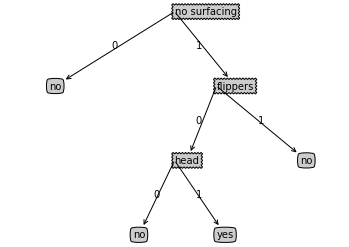

In [25]:
tree = retrieveTree(1)
createPlot(tree)

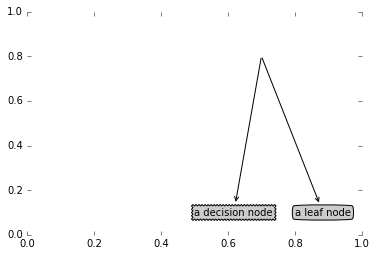

In [11]:
createPlot()